### Paper Implementation "Fuzzy Logic Approach for Line Following Mobile Robot Using an Array of Digital Sensors"
#### Source : https://www.researchgate.net/publication/306060311_Fuzzy_Logic_Approach_for_Line_Following_Mobile_Robot_Using_an_Array_of_Digital_Sensors


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib notebook

![title](img/Database.PNG)

In [2]:
##         S.no. | Sensor Input  |       Value        |    Error (i.e. value - setpoint_value)
# database=[[1, [0, 0, 0, 0, 1], 0.047619047619047616, -0.4761904761904762],
#           [2, [0, 0, 0, 1, 1], 0.09523809523809523, -0.4285714285714286],
#           [3, [0, 0, 0, 1, 0], 0.14285714285714285, -0.380952380952381],
#           [4, [0, 0, 1, 1, 1], 0.19047619047619047, -0.33333333333333337],
#           [5, [0, 0, 1, 0, 1], 0.23809523809523808, -0.28571428571428575],
#           [6, [0, 0, 1, 1, 0], 0.2857142857142857, -0.23809523809523814],
#           [7, [0, 1, 1, 1, 1], 0.3333333333333333, -0.19047619047619052],
#           [8, [0, 1, 1, 0, 1], 0.38095238095238093, -0.1428571428571429],
#           [9, [0, 1, 0, 1, 1], 0.42857142857142855, -0.09523809523809529],
#           [10,[0, 1, 0, 0, 1], 0.47619047619047616, -0.04761904761904767],
#
#           [11,[[0, 1, 0, 1, 0],
#                [0, 1, 1, 1, 0],
#                [0, 0, 1, 0, 0]], 0.5238095238095238, 0.0],
#
#           [12, [1, 0, 0, 1, 0], 0.5714285714285714, 0.04761904761904756],
#           [13, [1, 1, 0, 1, 0], 0.6190476190476191, 0.09523809523809523],
#           [14, [1, 0, 1, 1, 0], 0.6666666666666666, 0.1428571428571428],
#           [15, [1, 1, 1, 1, 0], 0.7142857142857143, 0.19047619047619047],
#           [16, [0, 1, 1, 0, 0], 0.7619047619047619, 0.23809523809523803],
#           [17, [1, 0, 1, 0, 0], 0.8095238095238095, 0.2857142857142857],
#           [18, [1, 1, 1, 0, 0], 0.8571428571428571, 0.33333333333333326],
#           [19, [0, 1, 0, 0, 0], 0.9047619047619048, 0.38095238095238093],
#           [20, [1, 1, 0, 0, 0], 0.9523809523809523, 0.4285714285714285],
#           [21, [1, 0, 0, 0, 0], 1.0, 0.47619047619047616]]
# database

In [3]:
min_Error=-0.4762   # from the database Table
max_Error=0.4762    # from the database Table
min_Speed=-50       # min output speed of motor
max_Speed=50        # min output speed of motor

In [4]:
Error = ctrl.Antecedent(np.arange(min_Error, max_Error, 0.001), 'Error')         # Control for Error
D_Error = ctrl.Antecedent(np.arange(min_Error, max_Error, 0.001), 'D_Error')     # Control for delta Error
Motors = ctrl.Consequent(np.arange(min_Speed, max_Speed, 0.01), 'Motors')        # Control for Motors

In [5]:
names = ['n', 'z', 'p']       # n: Negative Error ; z: Zero Error ; p: Postitive Error
Error.automf(names=names)     # rename  
D_Error.automf(names=names)   # rename

In [6]:
Error['n'] = fuzz.trimf(Error.universe, [min_Error, min_Error, 0])
Error['z'] = fuzz.trimf(Error.universe, [min_Error, 0, max_Error])
Error['p'] = fuzz.trimf(Error.universe, [0, max_Error, max_Error])

D_Error['n'] = fuzz.trimf(D_Error.universe, [min_Error, min_Error, 0])
D_Error['z'] = fuzz.trimf(D_Error.universe, [min_Error, 0, max_Error])
D_Error['p'] = fuzz.trimf(D_Error.universe, [0, max_Error, max_Error])

Motors['left'] = fuzz.trimf(Motors.universe, [min_Speed, min_Speed, 0])
Motors['forward'] = fuzz.trimf(Motors.universe, [min_Speed, 0, max_Speed])
Motors['right'] = fuzz.trimf(Motors.universe, [0, max_Speed, max_Speed])

<IPython.core.display.Javascript object>


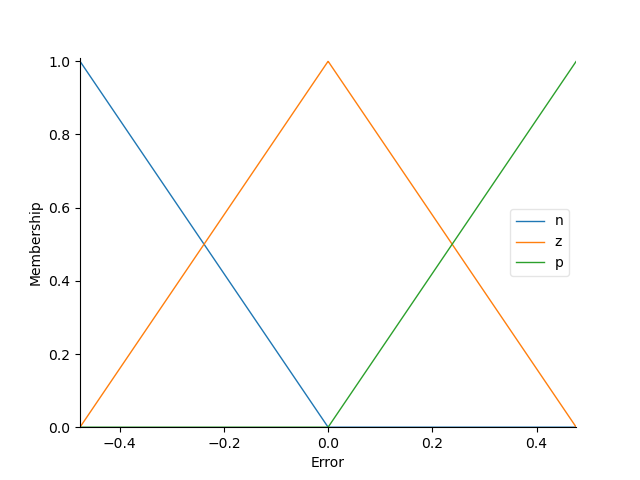

<IPython.core.display.Javascript object>


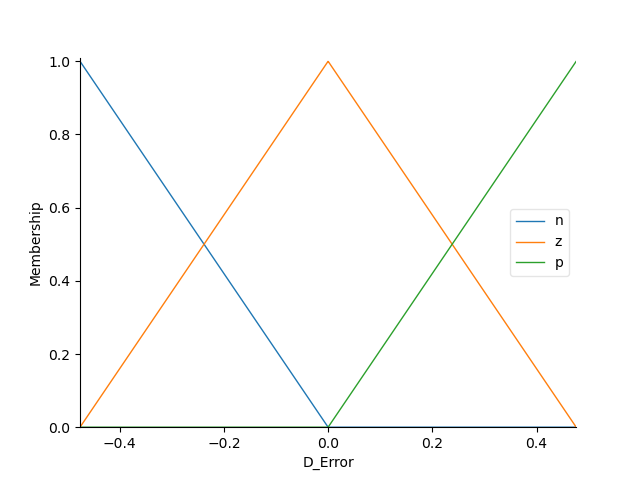

<IPython.core.display.Javascript object>


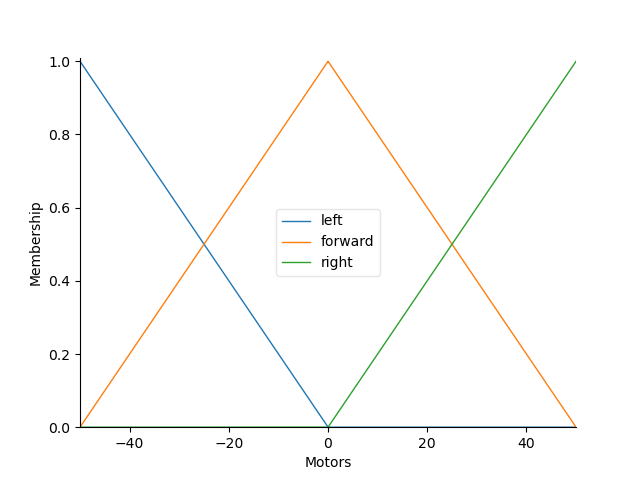

In [7]:
# You can see how these look with .view()
Error.view()
D_Error.view()
Motors.view()

![title](img/Rule.PNG)

In [8]:
# Rule from paper Fuzzy Rule Defination
rule1 = ctrl.Rule(Error['n'] & D_Error['n'], Motors['right'])      # if Error is Negative      And      D_Error is Negative     Then Motors is Right
rule2 = ctrl.Rule(Error['n'] & D_Error['z'], Motors['right'])      # if Error is Negative      And      D_Error is Zero         Then Motors is Right
rule3 = ctrl.Rule(Error['n'] & D_Error['p'], Motors['right'])      # if Error is Negative      And      D_Error is Positive     Then Motors is Right

rule4 = ctrl.Rule(Error['z'] & D_Error['n'], Motors['right'])      # if Error is Zero          And      D_Error is Negative     Then Motors is Right
rule5 = ctrl.Rule(Error['z'] & D_Error['z'], Motors['forward'])    # if Error is Zero          And      D_Error is Zero         Then Motors is Forward
rule6 = ctrl.Rule(Error['z'] & D_Error['p'], Motors['left'])       # if Error is Zero          And      D_Error is Positive     Then Motors is Left

rule7 = ctrl.Rule(Error['p'] & D_Error['n'], Motors['left'])       # if Error is Positive      And      D_Error is Negative     Then Motors is Left
rule8 = ctrl.Rule(Error['p'] & D_Error['z'], Motors['left'])       # if Error is Positive      And      D_Error is Zero         Then Motors is Left
rule9 = ctrl.Rule(Error['p'] & D_Error['p'], Motors['left'])       # if Error is Positive      And      D_Error is Positive     Then Motors is Left
# rule1.view()

motors_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9 ])
motors_speed = ctrl.ControlSystemSimulation(motors_ctrl)

Speed of Motor is :  3.1268553139343473


<IPython.core.display.Javascript object>


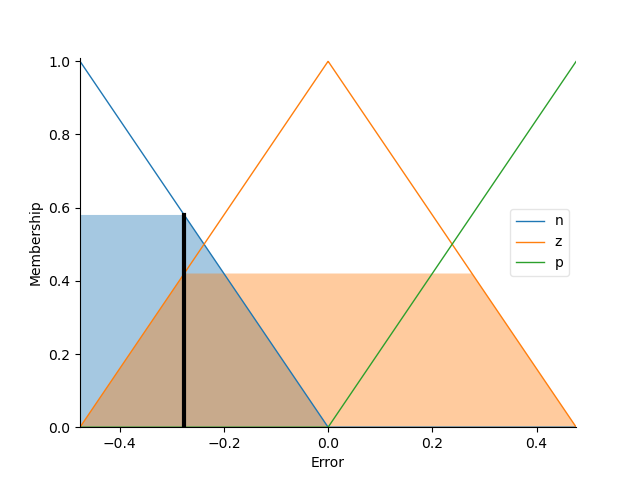

<IPython.core.display.Javascript object>


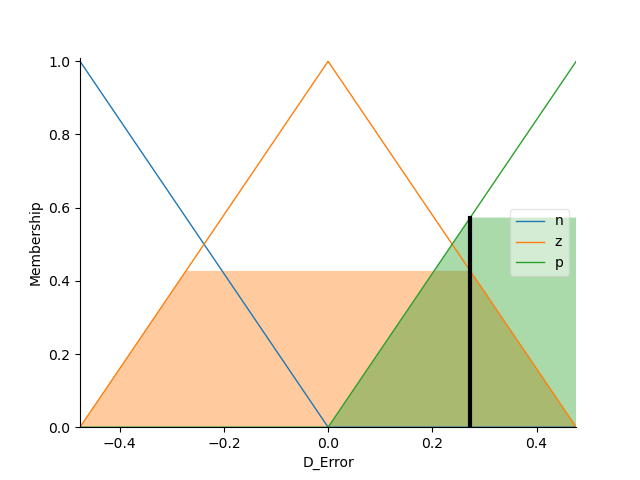

<IPython.core.display.Javascript object>


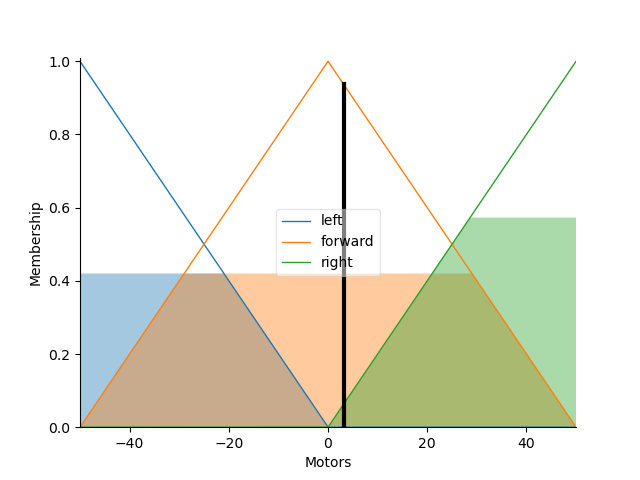

In [9]:
# Testing 
motors_speed.input['Error'] = -0.2762
motors_speed.input['D_Error'] = 0.2728
motors_speed.compute()
print("Speed of Motor is : ",motors_speed.output['Motors'])
Error.view(sim=motors_speed)
D_Error.view(sim=motors_speed)
Motors.view(sim=motors_speed)


In [12]:
def get_Speed(Error,D_Error):
    motors_speed.input['Error'] = Error
    motors_speed.input['D_Error'] = D_Error
    motors_speed.compute()
    return motors_speed.output['Motors']

### Testing

In [13]:
e=0.2728
de=0.2728
speed = get_Speed(e,de)
print("If Error = ",e," and Delta Error = ",de," the speed of motor = ",speed)

If Error =  0.2728  and Delta Error =  0.2728  the speed of motor =  -7.940761234482266


# Visualization of Fuzzy

In [14]:
interval=0.1
x=np.arange(min_Error, max_Error, interval)  # Generating array range from min_Error to max_Error with interval: 0.1
y=np.arange(min_Error, max_Error, interval)  # Generating array range from min_Error to max_Error with interval: 0.1
x, y = np.meshgrid(x, y)                     # Generating mesh Grid of x and y for ploting 3D plot

In [15]:
z = get_Speed(x,y)                           # Computing Z value

<IPython.core.display.Javascript object>


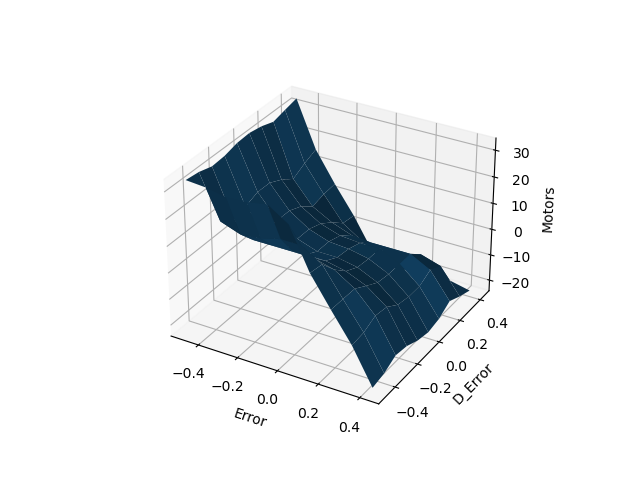

In [16]:
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(x,y,z)
ax.set_xlabel('Error')
ax.set_ylabel('D_Error')
ax.set_zlabel('Motors')

plt.show()